相关结论：
1、先使用boxplot盒图查看全部特性的数据分布情况，主要是查看异常值。结论是：chlorides氯化物和糖分的异常值比较突出，其他的特性都比较合理。
2、使用hist直方图查看全部特征的频率分布情况，情况是氯化物和糖分的数据集中度都很高，且红酒品质79%的数据集中在5/6.
3、接下来对红酒品质和这11个理化特性进行双变量分析，以红酒品质评分作为x，与11个理化特性画boxplot图，通过boxplot图，我们可以得到：
   品质好的酒有更高的柠檬酸，硫酸盐，和酒精度数。硫酸盐(硫酸钙)的加入通常是调整酒的酸度的。其中酒精度数和品质的相关性最高。
   品质好的酒有较低的挥发性酸类，密度，和pH。
   残留糖分，氯离子，二氧化硫似乎对酒的品质影响不大。
4、接着用pearson相关系数计算11个特性与红酒品质的相关性，与3的结论一致。
5、从双变量分析中，分别抽取酒精浓度、挥发性酸与红酒品质进行多变量分析，将三者使用散点图画出，得到对于好酒（7，8）以及差酒（3，4），关系很明显。但是对于中等酒（5，6），酒精浓度的挥发性酸度有很大程度的交叉。的结论。
6、整体而言，红酒的品质主要与酒精浓度，挥发性酸，和柠檬酸有关。对于品质优于7，或者劣于4的酒，直观上是线性可分的。但是品质为5，6的酒很难线性区分。

In [ ]:
因此这里取这两个特性与品质画boxplot,查看这两个特性在红酒品质评分区间的分布情况，

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [32]:
# 创建调色板
color = sns.color_palette()

# 数据显示小数点后三位
pd.set_option('precision', 3)

dataPath = './winequality-red.csv'
df = pd.read_csv(dataPath, sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


In [54]:
color[0]

(0.8862745098039215, 0.2901960784313726, 0.2)

In [35]:
df.loc[795:805, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
795,10.8,0.890,0.30,2.6,0.132,7.0,60.0,0.998,2.99,1.18,10.2,5
796,8.7,0.460,0.31,2.5,0.126,24.0,64.0,0.997,3.10,0.74,9.6,5
797,9.3,0.370,0.44,1.6,0.038,21.0,42.0,0.995,3.24,0.81,10.8,7
798,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.999,3.29,0.52,10.7,6
799,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.999,3.29,0.52,10.7,6
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.996,3.25,0.51,9.4,5
801,8.6,0.550,0.09,3.3,0.068,8.0,17.0,0.997,3.23,0.44,10.0,5
802,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.993,3.56,0.94,12.9,7
803,7.7,0.560,0.08,2.5,0.114,14.0,46.0,0.997,3.24,0.66,9.6,6
804,8.4,0.520,0.22,2.7,0.084,4.0,18.0,0.997,3.26,0.57,9.9,6


In [37]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000



Figure 1: Univariate BoxPlots


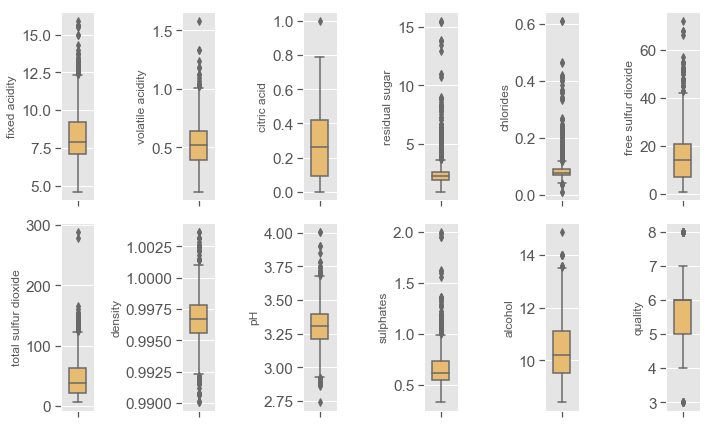

In [50]:
# 设置样式
plt.style.use('ggplot')
colnm = df.columns.tolist() 
fig = plt.figure(figsize=(10,6))

for i in range(12):
    plt.subplot(2, 6, i+1)  # range(12)代表12个位置，2代表行，6代表列
#     plt.subplot(numrows, numcols, fignum)
    sns.boxplot(df[colnm[i]], orient='v', width=0.5, color=color[4])  # orient参数用于控制图像水平/竖直显示(v/h)
    plt.ylabel(colnm[i], fontsize=12)
    plt.tight_layout()  # tight_layout设置自动调整子图参数，使之填充整个图像区域
print('\nFigure 1: Univariate BoxPlots')
    


Figure 2: Univariate Histograms


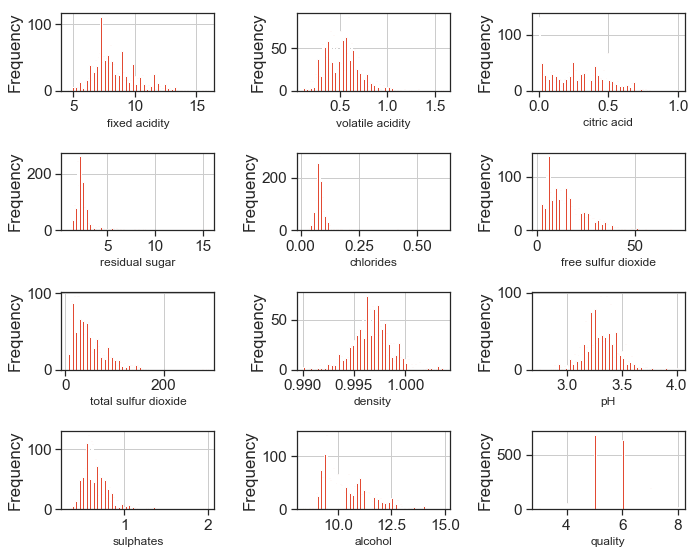

In [104]:
colnm = df.columns.tolist()
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    df[colnm[i]].hist(bins=100, color=color[0])  # bins指bin(箱子)的个数，即每张国柱的个数
    plt.xlabel(colnm[i], fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 2: Univariate Histograms')

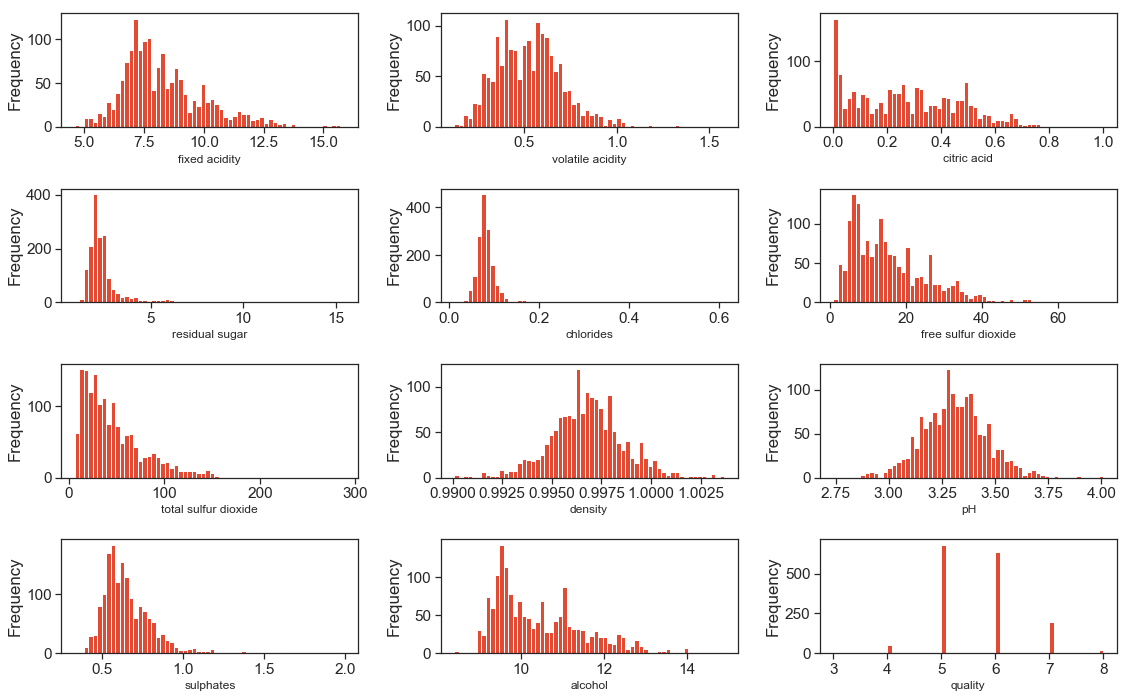

In [111]:
colnm = df.columns.tolist()
plt.figure(figsize=(16,10))

for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.hist(df[colnm[i]], bins=60)
    plt.xlabel(colnm[i], fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout()

In [93]:
# df['quality'].apply(lambda x: x /df['quality'].sum())


pd.cut(df['quality'], bins=[4.9,6]).value_counts() / len(df['quality'])

(4.9, 6.0]    0.825
Name: quality, dtype: float64

### 品质
这个数据集的目的是研究红酒品质和理化性质之间的关系。品质的评价范围是0-10，这个数据集中范围是3到8，有82%的红酒品质是5或6。

## 酸度相关的特征
这个数据集有7个酸度相关的特征：fixed acidity, volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, pH。
前6个特征都与红酒的pH的相关。
pH是在对数的尺度，下面对前6个特征取对数然后作histogram。


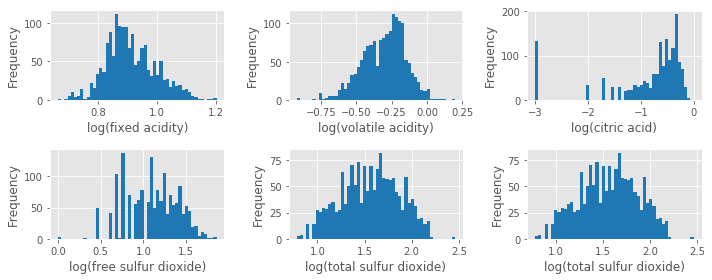

In [16]:
acidityFeat = ['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide','total sulfur dioxide', 'sulphates']

plt.figure(figsize=(10, 4))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    v = np.log10(np.clip(df[acidityFeat[i]].values, a_min=0.001, a_max=None))  # np.clip()将一个数组元素的值限制在一个范围内
    plt.hist(v, bins=50, color=color[0])  
    plt.xlabel('log(' + acidityFeat[i] + ')', fontsize=12)
    plt.ylabel('Frequency')

plt.tight_layout()

In [78]:
bins = 10 ** (np.linspace(-2, 2, 50))
bins

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

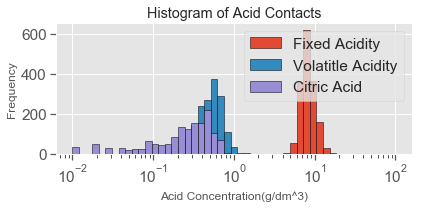

In [86]:
plt.figure(figsize=(6,3))

bins = 10 ** (np.linspace(-2, 2, 50))

plt.hist(df['fixed acidity'], bins=bins, edgecolor='k', label='Fixed Acidity')  # bins:直方图的柱数，
plt.hist(df['volatile acidity'], bins=bins, edgecolor='k', label='Volatitle Acidity')
plt.hist(df['citric acid'], bins=bins, edgecolor='k', label='Citric Acid')
plt.xscale('log')
plt.xlabel('Acid Concentration(g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Contacts')
plt.legend(loc='best')
plt.tight_layout()


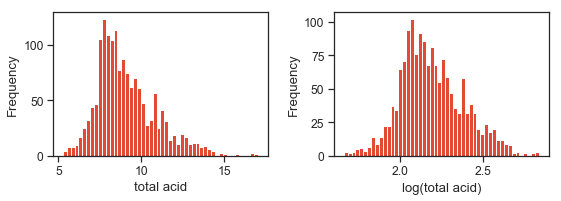

In [98]:
# 总酸度
df['total acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.hist(df['total acid'], bins=50, color=color[0])
plt.xlabel('total acid')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(np.log(df['total acid']), bins=50, color=color[0])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')
plt.tight_layout()


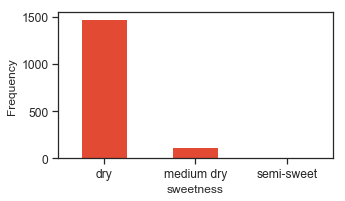

In [99]:
df['sweetness'] = pd.cut(df['residual sugar'], bins=[0,4,12,45], labels=['dry', 'medium dry', 'semi-sweet'])

plt.figure(figsize=(5,3))
df['sweetness'].value_counts().plot(kind='bar', color=color[0])
plt.xticks(rotation=0)
plt.xlabel('sweetness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()


## 双变量分析
红酒品质和理化特征的关系¶ 下面Figure 7和8分别显示了红酒理化特征和品质的关系。其中可以看出的趋势有：
品质好的酒有更高的柠檬酸，硫酸盐，和酒精度数。硫酸盐(硫酸钙)的加入通常是调整酒的酸度的。其中酒精度数和品质的相关性最高。
品质好的酒有较低的挥发性酸类，密度，和pH。
残留糖分，氯离子，二氧化硫似乎对酒的品质影响不大。


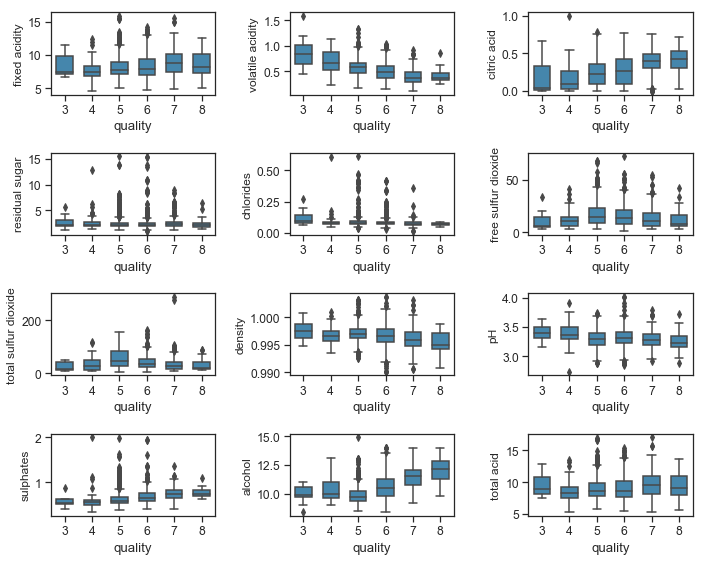

In [100]:
sns.set_style('ticks') # 设置图表主题是十字叉
sns.set_context('notebook', font_scale=1.1)

colnm = df.columns.tolist()[:11] + ['total acid']
plt.figure(figsize=(10, 8))

for i in range(12):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='quality', y=colnm[i], data=df, color=color[1], width=0.6)
    plt.ylabel(colnm[i], fontsize=12)
    
plt.tight_layout()

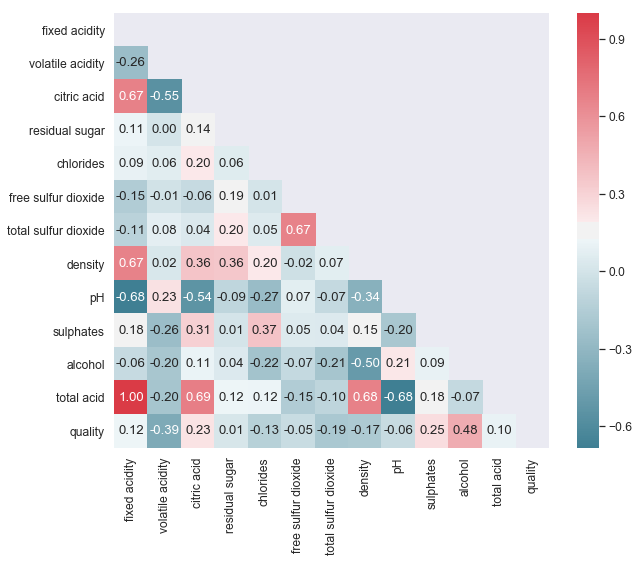

In [21]:
sns.set_style('dark')

plt.figure(figsize=(10, 8))
colnm = df.columns.tolist()[:11] + ['total acid', 'quality']
mcorr = df[colnm].corr() # 相关系数矩阵， 即给出任意两个变量之间的相关系数
mask = np.zeros_like(mcorr, dtype=np.bool)  # 创建一个mcorr一样的False矩阵
mask[np.triu_indices_from(mask)] = True # 上三角位置为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 创建一个发散调色板
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')


In [22]:
mcorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,total acid,quality
fixed acidity,1.000,-0.256,0.672,0.115,0.094,-0.154,-0.113,0.668,-0.683,0.183,-0.062,0.996,0.124
volatile acidity,-0.256,1.000,-0.552,0.002,0.061,-0.011,0.076,0.022,0.235,-0.261,-0.202,-0.204,-0.391
citric acid,0.672,-0.552,1.000,0.144,0.204,-0.061,0.036,0.365,-0.542,0.313,0.110,0.690,0.226
residual sugar,0.115,0.002,0.144,1.000,0.056,0.187,0.203,0.355,-0.086,0.006,0.042,0.124,0.014
chlorides,0.094,0.061,0.204,0.056,1.000,0.006,0.047,0.201,-0.265,0.371,-0.221,0.117,-0.129
free sulfur dioxide,-0.154,-0.011,-0.061,0.187,0.006,1.000,0.668,-0.022,0.070,0.052,-0.069,-0.154,-0.051
total sulfur dioxide,-0.113,0.076,0.036,0.203,0.047,0.668,1.000,0.071,-0.066,0.043,-0.206,-0.096,-0.185
density,0.668,0.022,0.365,0.355,0.201,-0.022,0.071,1.000,-0.342,0.149,-0.496,0.676,-0.175
pH,-0.683,0.235,-0.542,-0.086,-0.265,0.070,-0.066,-0.342,1.000,-0.197,0.206,-0.683,-0.058
sulphates,0.183,-0.261,0.313,0.006,0.371,0.052,0.043,0.149,-0.197,1.000,0.094,0.182,0.251


(7, 16)

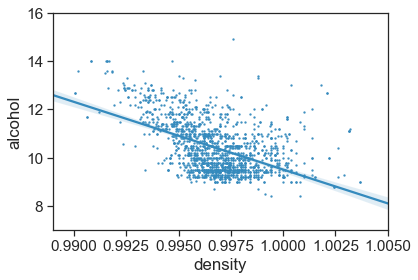

In [103]:
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.4)
plt.figure(figsize=(6,4))
sns.regplot(x='density', y='alcohol', data=df, scatter_kws={'s':2}, color=color[1])
plt.xlim(0.989, 1.005)
plt.ylim(7, 16)


<function matplotlib.pyplot.tight_layout>

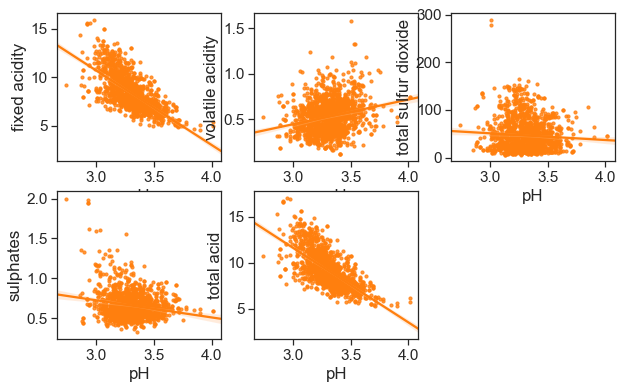

In [24]:
acidity_related = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'total acid']
plt.figure(figsize=(10, 6))

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.regplot(x='pH', y=acidity_related[i], data=df, scatter_kws={'s':10}, color=color[1])
plt.tight_layout

C:\Users\CFR41\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


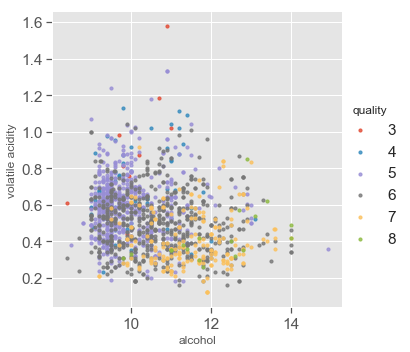

In [25]:
plt.style.use('ggplot')
sns.lmplot(x='alcohol', y='volatile acidity', hue='quality', data=df, fit_reg=False, scatter_kws={'s':10}, size=5)

C:\Users\CFR41\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


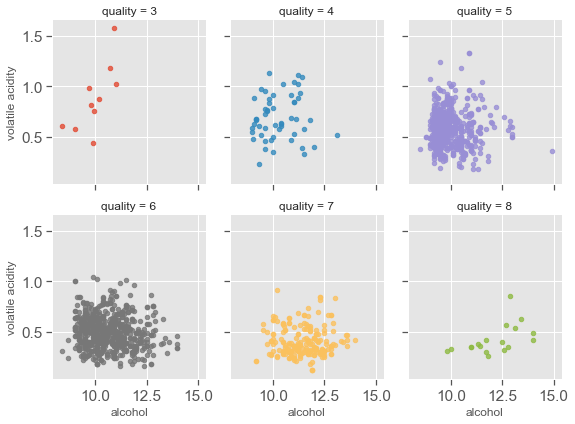

In [27]:
sns.lmplot(x='alcohol', y='volatile acidity', col='quality', hue='quality', data=df, 
           fit_reg=False, size=3, aspect=0.9, col_wrap=3, scatter_kws={'s':20})

Figure 12: pH with Fixed Acidity and Citric Acid


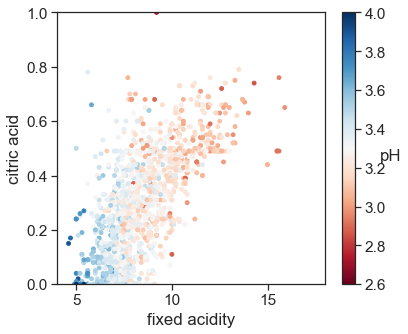

In [28]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

plt.figure(figsize=(6,5))
cm = plt.cm.get_cmap('RdBu')
sc = plt.scatter(df['fixed acidity'], df['citric acid'], c=df['pH'], vmin=2.6, vmax=4, s=15, cmap=cm)
bar = plt.colorbar(sc)
bar.set_label('pH', rotation = 0)
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.xlim(4,18)
plt.ylim(0,1)
print('Figure 12: pH with Fixed Acidity and Citric Acid')


#  利用随机森林、svm红酒进行分类

In [123]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

C:\Users\CFR41\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


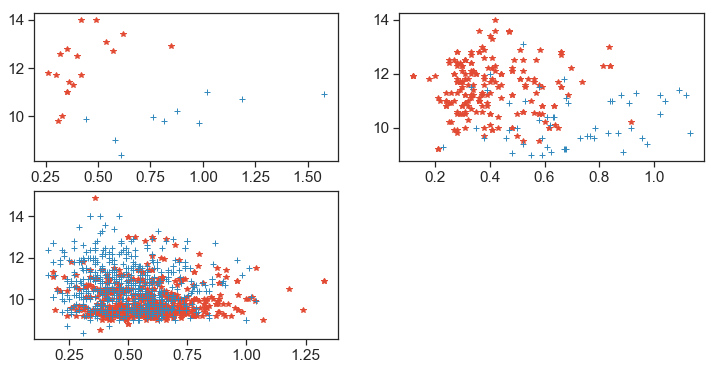

In [115]:
# 筛选与红酒品质相关性较大的两个变量，（酒精度和挥发性酸）
X = df[['pH', 'fixed acidity', 'citric acid']].as_matrix()
x1 = df[['volatile acidity', 'alcohol']]   # 酒精度和挥发性酸

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(2,2,3)

ax1.plot(x1[df['quality'] == 8].iloc[:, 0], x1[df['quality'] == 8].iloc[:, 1], '*')
ax1.plot(x1[df['quality'] == 3].iloc[:, 0], x1[df['quality'] == 3].iloc[:, 1], '+')


ax2.plot(x1[df['quality'] == 7].iloc[:, 0], x1[df['quality'] == 7].iloc[:, 1], '*')
ax2.plot(x1[df['quality'] == 4].iloc[:, 0], x1[df['quality'] == 4].iloc[:, 1], '+')

ax3.plot(x1[df['quality'] == 5].iloc[:, 0], x1[df['quality'] == 5].iloc[:, 1], '*')
ax3.plot(x1[df['quality'] == 6].iloc[:, 0], x1[df['quality'] == 6].iloc[:, 1], '+')


### 
1）、左上图：品质最好8与最差3有很明显的界限；
2）、右上图：品质4与7界限比较模糊；
3）、左下图：5与6之间很乱，可舍弃，

In [135]:
# 提取3，4，7，8的样本，对其进行标准化处理，然后划分
data = df[(df['quality'] == 3) | (df['quality'] == 8) | (df['quality'] == 4) | (df['quality'] == 7)]
data = data.drop('sweetness', axis=1)
X_scale = preprocessing.scale(data)
Y = data.iloc[:, 11]

# 定义
Y[Y == 3] = 0
Y[Y == 4] = 1
Y[Y == 7] = 2
Y[Y == 8] = 3

X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=42)

print(data.head())
len(data)

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
16            8.5              0.28         0.56             1.8      0.092   
18            7.4              0.59         0.08             4.4      0.086   
37            8.1              0.38         0.28             2.1      0.066   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
7                  15.0                  21.0    0.995  3.39       0.47   
8                   9.0                  18.0    0.997  3.36       0.57   
16                 35.0                 103.0    0.997  3.30       0.75   
18                  6.0                  29.0    0.997  3.38       0.50   
37                 13.0                  30.0    0.997  3.23       0.73   

    alcohol  quality  total acid  
7      10.0        2        7.95  
8   

C:\Users\CFR41\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\CFR41\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\CFR41\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\CFR41\Anac

280

In [143]:
X_train[1]

array([-0.6252735 ,  0.72362257, -1.07796017, -0.20980042, -0.00842466,
        0.24538239, -0.05736918,  0.56147408,  1.64830055, -0.11410741,
       -0.38004216,  0.46634773, -0.63262849])

In [147]:
Y

7       2
8       2
16      2
18      1
37      2
       ..
1541    2
1544    2
1549    3
1555    2
1584    2
Name: quality, Length: 280, dtype: int64

In [145]:
X_scale[1]

array([-0.42151839,  0.471358  , -1.45151072, -0.48640603, -0.16719701,
       -0.45571016, -0.53830839,  0.29536618,  0.30399612, -0.81888849,
       -1.54236126,  0.46634773, -0.50372804])

In [148]:
y_train

517     0
902     2
1038    2
38      1
855     2
       ..
1058    2
481     3
704     1
1484    1
657     2
Name: quality, Length: 224, dtype: int64

In [140]:
rf1 = RandomForestClassifier(n_estimators=1000)
rf1.fit(X_train, y_train)
rf1.predict(X_test)
print('随机森林测试集准确率: ', (sum(y_test.as_matrix() - rf1.predict(X_test == 0) / len(y_test))))

随机森林测试集准确率:  97.9999999999999


C:\Users\CFR41\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
